# 감정분석 모델 생성

# Step 1. 데이터 수집
## 1-1. csv파일로 데이터 불러오기

In [24]:
import pandas as pd

In [25]:
df1 = pd.read_csv('data/data-preprocess/data-1.csv', encoding='cp949')
df2 = pd.read_csv('data/data-preprocess/data-2.csv', encoding='cp949')
df3 = pd.read_csv('data/data-preprocess/data-3.csv', encoding='cp949')

df = df = pd.concat([df1,df2,df3])
df

,발화문,1번 감정
0,"어, 청소 니가 대신 해 줘!",Neutral
1,둘 다 청소 하기 싫어. 귀찮아.,Neutral
2,둘 다 하기 싫어서 화내.,Angry
3,그럼 방세는 어떡해.,Sadness
4,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,Sadness
...,...,...
19369,나 엘리베이터에 갇혔어.,happiness
19370,하지만 기분이 나쁜 걸 어떡해?,sadness
19371,자취방 엘리베이턴데 정전인가봐.,sadness
19372,나 드디어 프로젝트 끝났어!,disgust


In [26]:
df.loc[:, '1번 감정'] = df['1번 감정'].str.lower()
unique_count = df['1번 감정'].unique()
print(unique_count)

['neutral' 'angry' 'sadness' 'disgust' 'surprise' 'fear' 'happiness']


In [27]:
df = df[df['1번 감정'] != 'neutral']
unique_count = df['1번 감정'].unique()
print(unique_count)

['angry' 'sadness' 'disgust' 'surprise' 'fear' 'happiness']


In [28]:
import pandas as pd
df_copy = df.copy()

#감정을 숫자로 매칭
df_copy.loc[(df_copy['1번 감정'] == "angry"), '1번 감정'] = 0
df_copy.loc[(df_copy['1번 감정'] == "disgust"), '1번 감정'] = 0
df_copy.loc[(df_copy['1번 감정'] == "sadness"), '1번 감정'] = 1
df_copy.loc[(df_copy['1번 감정'] == "fear"), '1번 감정'] = 2
df_copy.loc[(df_copy['1번 감정'] == "surprise"), '1번 감정'] = 2
df_copy.loc[(df_copy['1번 감정'] == "happiness"), '1번 감정'] = 3

# 원래 df에 다시 넣어주고, 맨 왼쪽의 인덱스를 초기화해줌
df.loc[:, '1번 감정'] = df_copy['1번 감정']
df.reset_index(drop=True, inplace=True)

In [29]:
df #df 확인

,발화문,1번 감정
0,둘 다 하기 싫어서 화내.,0
1,그럼 방세는 어떡해.,1
2,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,1
3,어. 고등학교 동창인데 이렇게 더럽게 쓸줄 몰랐어.,0
4,오늘 헤어졌어.,1
...,...,...
32028,맞아. 나한테만 퉁명스럽고 일을 많이 시키더라고.,1
32029,나 엘리베이터에 갇혔어.,3
32030,하지만 기분이 나쁜 걸 어떡해?,1
32031,자취방 엘리베이턴데 정전인가봐.,1


In [30]:
data_list = []
target_list = []

for q,  label in zip(df['발화문'], df['1번 감정']):
    data_list.append(q)
    target_list.append(label)

distribute_data = data_list
distribute_target = target_list

In [32]:
from konlpy.tag import Okt

okt=Okt()

tokenized_data = []

for s in distribute_data:
    text_2 = [word for word, pos in okt.pos(s) if (pos != 'Punctuation') and (pos != 'Josa') and (pos != 'Adverb')] # 조사 또는 문장부호는 빼줌
    if text_2:  # 빈 리스트가 아닌 경우에만 추가
        tokenized_data.append(text_2)

In [42]:
print(okt.pos(distribute_data[1]))
print(distribute_data[1])
print(tokenized_data[1])
print(distribute_target[1])

[('그럼', 'Adjective'), ('방', 'Noun'), ('세는', 'Verb'), ('어떡해', 'Adjective'), ('.', 'Punctuation')]
그럼 방세는 어떡해.
['그럼', '방', '세는', '어떡해']
1


In [43]:
from collections import Counter

# 전체 데이터에 대한 단어 빈도수 계산
word_counts = Counter(word for sentence in tokenized_data for word in sentence)

# 빈도수에 따라 단어를 정렬
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# 상위 N개의 단어로 단어 사전 만들기
top_words = [word for word, count in sorted_words[:500]]
word_to_index = {word: idx for idx, word in enumerate(top_words)}

# 모든 데이터를 숫자로 변환
num_tokenized_data = [[word_to_index.get(word, 0) for word in sentence] for sentence in tokenized_data]

In [44]:
# 상위 500개의 단어 선택
top_words = [word for word, count in word_counts.most_common(500)]

# 상위 500개의 단어에 대한 빈도수 출력
for word in top_words:
    print(f'{word}: {word_counts[word]}번')

나: 5575번
안: 3853번
내: 2431번
것: 2381번
거: 1940번
들: 1931번
또: 1903번
같아: 1754번
못: 1685번
있어: 1683번
친구: 1662번
잘: 1521번
지금: 1492번
정말: 1469번
어제: 1433번
한: 1430번
없어: 1417번
집: 1382번
사람: 1351번
	: 1226번
회사: 1219번
해피: 1180번
진짜: 1167번
응: 1104번
그: 1053번
아: 1037번
아니: 1033번
좀: 1029번
시간: 1023번
약속: 1019번
했어: 967번
청소: 958번
해: 928번
기분: 919번
일: 918번
할: 892번
우리: 888번
말: 875번
애: 855번
돼: 854번
생각: 838번
하는: 834번
갑자기: 834번
같: 801번
어: 780번
때: 778번
화장실: 775번
더: 772번
봐: 770번
왔어: 739번
연락: 727번
그냥: 727번
했는데: 714번
요즘: 708번
면접: 707번
마음: 693번
거야: 690번
고마워: 681번
오늘: 674번
일이: 673번
그래: 668번
술: 668번
않아: 648번
어떻게: 648번
이: 641번
때문: 634번
다른: 626번
좋은: 623번
있는데: 592번
됐어: 585번
당첨: 578번
냄새: 571번
아빠: 562번
왜: 556번
나도: 546번
곰팡이: 536번
이제: 534번
계속: 529번
퇴근: 529번
있어서: 526번
자주: 523번
얘기: 521번
해야: 521번
번: 506번
세상: 506번
하고: 500번
다시: 496번
떨어졌어: 496번
뭐: 485번
토: 480번
모르겠어: 473번
걱정: 471번
다쳤어: 470번
전화: 463번
아무: 453번
떠났어: 445번
해도: 440번
얼마나: 432번
매일: 432번
이번: 431번
그런: 429번
수: 428번
이벤트: 424번
너: 422번
달: 421번
헤어졌어: 418번
우울해: 418번
해서: 416번
힘들어: 415번
이야기: 

In [45]:
print(num_tokenized_data[0:10])
print(distribute_target[0:10])

[[0, 426, 0, 0], [337, 138, 0, 0], [0, 0, 0, 66, 18, 0, 0], [44, 233, 407, 487, 0, 408], [58, 105], [154, 80, 147, 39], [0, 329, 0, 65, 423, 110, 16], [64, 20, 99, 0, 262, 20, 236], [26, 395, 16], [23, 0, 0]]
[0, 1, 1, 0, 1, 1, 1, 1, 1, 0]


In [46]:
import numpy as np
lengths = np.array([len(x) for x in num_tokenized_data])
print(np.mean(lengths), np.median(lengths))

7.345924515343552 7.0


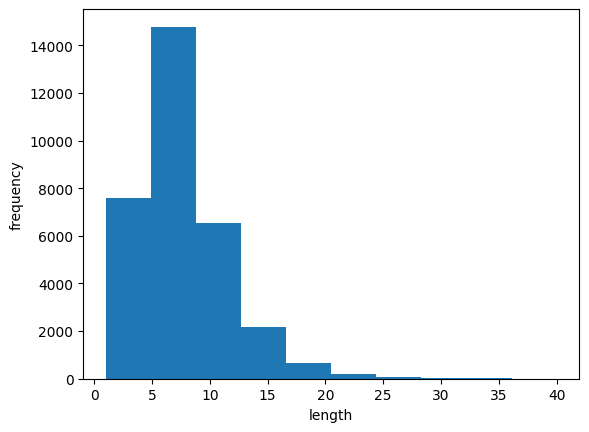

In [47]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel("length")
plt.ylabel("frequency")
plt.show()

In [48]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(num_tokenized_data, maxlen = 8)

print(train_seq.shape)

(32033, 8)


In [49]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(train_seq, distribute_target, test_size = 0.2, random_state = 42)

In [50]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [51]:
train_target = np.array(train_target)
val_target = np.array(val_target)
test_target = np.array(test_target)

print(train_input.shape)
print(val_input.shape)
print(test_input.shape)

print(train_target.shape)
print(val_target.shape)
print(test_target.shape)

(20500, 8)
(5126, 8)
(6407, 8)
(20500,)
(5126,)
(6407,)


# Step 2. 모델

## 2-1. 모델 학습

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

# 모델 정의
model = Sequential()
model.add(Embedding(input_dim=500, output_dim=128, input_length=8))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax')) # 클래스의 개수에 맞게 설정

# 모델 컴파일
optimizer = SGD(learning_rate=0.005)
model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 콜백 정의
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

# 모델 학습
history = model.fit(train_input, train_target, epochs=80, batch_size=64,
                    validation_data=(val_input, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/80
321/321 [==============================] - 7s 14ms/step - loss: 1.1806 - accuracy: 0.4845 - val_loss: 1.2041 - val_accuracy: 0.4557
Epoch 2/80
321/321 [==============================] - 4s 13ms/step - loss: 1.0105 - accuracy: 0.5798 - val_loss: 1.0086 - val_accuracy: 0.5962
Epoch 3/80
321/321 [==============================] - 5s 14ms/step - loss: 0.9483 - accuracy: 0.6129 - val_loss: 0.9226 - val_accuracy: 0.6284
Epoch 4/80
321/321 [==============================] - 7s 20ms/step - loss: 0.9066 - accuracy: 0.6323 - val_loss: 0.8812 - val_accuracy: 0.6395
Epoch 5/80
321/321 [==============================] - 6s 19ms/step - loss: 0.8718 - accuracy: 0.6503 - val_loss: 0.8541 - val_accuracy: 0.6627
Epoch 6/80
321/321 [==============================] - 6s 17ms/step - loss: 0.8492 - accuracy: 0.6589 - val_loss: 0.8323 - val_accuracy: 0.6740
Epoch 7/80
321/321 [==============================] - 6s 17ms/step - loss: 0.8265 - accuracy: 0.6689 - val_loss: 0.8558 - val_accuracy: 0.6791

## 2-2. 모델 평가

In [66]:
# 패딩이 완료된 테스트 데이터
test_input = pad_sequences(test_input, maxlen=8)

loss, accuracy = model.evaluate(test_input, test_target)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

201/201 [==============================] - 1s 3ms/step - loss: 0.6952 - accuracy: 0.7383
Test Loss: 0.6951923370361328
Test Accuracy: 0.7382550239562988


# STEP 3. 문장에서 감정분석 하기

In [63]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import konlpy
from konlpy.tag import Okt

# Assuming 'model' and 'word_to_index' are defined before this code

# Load the Okt tokenizer
okt = Okt()

while True:
    # 입력 문장
    input_sentence = input()

    # 종료 조건 확인
    if input_sentence == '0':
        break

    # 입력 문장 토큰화 및 패딩
    input_tokens = [word for word, pos in okt.pos(input_sentence) if (pos != 'Punctuation') and (pos != 'Josa') and (pos != 'Adverb')]
    input_indices = [word_to_index.get(word, 0) for word in input_tokens]
    padded_input = pad_sequences([input_indices], maxlen=8)

    # 모델 예측
    predicted_probabilities = model.predict(padded_input)
    predicted_class = np.argmax(predicted_probabilities)

    # 예측된 결과 출력
    emotions = ['분노', '슬픔', '불안', '기쁨']
    predicted_emotion = emotions[predicted_class]

    print(f"입력 문장: {input_sentence}")
    print(f"예측된 감정: {predicted_emotion}")
    print(f"각 클래스의 확률: {predicted_probabilities[0]}")


1/1 [==============================] - 0s 365ms/step
입력 문장: 아 존나 힘들다
예측된 감정: 분노
각 클래스의 확률: [0.41666287 0.3910993  0.15109624 0.04114154]
1/1 [==============================] - 0s 34ms/step
입력 문장: 씨발 개같다 그만 둘래
예측된 감정: 슬픔
각 클래스의 확률: [0.28495836 0.4504039  0.16031863 0.10431907]
1/1 [==============================] - 0s 26ms/step
입력 문장: 진짜 너무하다 너
예측된 감정: 분노
각 클래스의 확률: [0.42040607 0.15896325 0.23334064 0.18729001]
1/1 [==============================] - 0s 24ms/step
입력 문장: 그래도 너가 있어서 좋아
예측된 감정: 기쁨
각 클래스의 확률: [0.01357527 0.02505132 0.01729299 0.9440805 ]
1/1 [==============================] - 0s 26ms/step
입력 문장: 내일 시험 봐서 너무 불안해
예측된 감정: 불안
각 클래스의 확률: [0.04506565 0.27138492 0.50351095 0.18003854]
